# Setup Awal

In [1]:
# Mennghubungkan ke google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Library untuk manipulasi data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libary untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Pengaturan agar visualisasi langsung tampil di notebook
%matplotlib inline

# Mengatur style default untuk plot seaborn agar lebih menarik
sns.set_style('whitegrid')

print("Library berhasil di-import!")

Library berhasil di-import!


# Muat Dataset

In [3]:
# Tentukan path ke file dataset kamu
file_path = '/content/drive/MyDrive/Dibimbing/Exam Penyaluran Kerja/Dataset/Food_Delivery_Times.csv'

# Baca file csv dan muat ke dalam DataFrame pandas
df = pd.read_csv(file_path)

print("Dataset berhasil dimuat!")

Dataset berhasil dimuat!


# Inspeksi Data Awal

In [4]:
# Menampilkan 5 baris pertama dari dataset
print("5 Baris Pertama Data:")
display(df.head())

print("\n" + "="*50 + "\n")

# Menampilkan informasi ringkas tentang DataFrame
print("Informasi Dataset:")
df.info()

print("\n" + "="*50 + "\n")

# Menampilkan statistik deskriptif untuk kolom numerik
print("Statistik Deskriptif:")
display(df.describe())

5 Baris Pertama Data:


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68




Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


Statistik Deskriptif:


,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


Jumlah entri: 1000

Kolom kategorikal: Weather, Traffic_Level, Time_of_Day, Vehicle_Type

Kolom numerik: Distance_km, Preparation_Time_min, Courier_Experience_yrs, Delivery_Time_min

Missing Value: Courier_Experience_yrs, Weather, Traffic_Level, Time_of_Day: 970 non-null → ada 30 nilai kosong

###  Missing Values

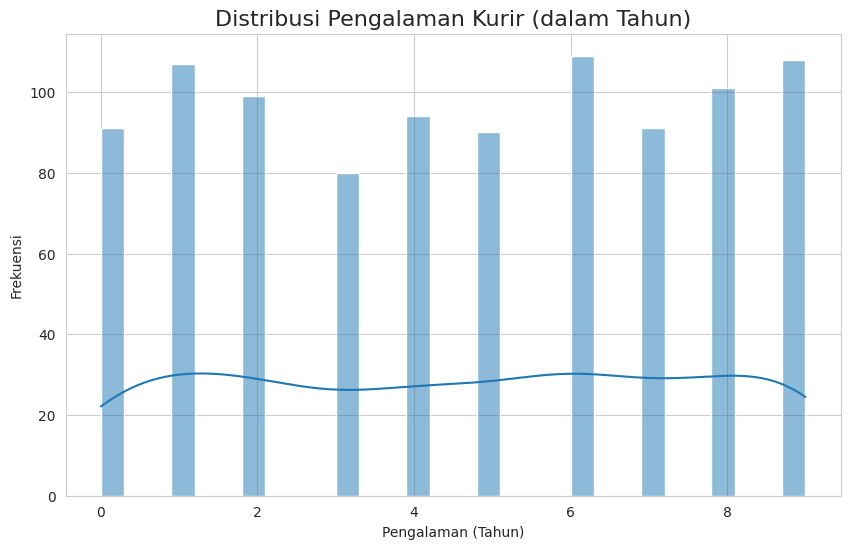

In [5]:
# Visualisasi distribusi kolom Courier_Experience_yrs
plt.figure(figsize=(10, 6))
sns.histplot(df['Courier_Experience_yrs'], bins=30, kde=True)
plt.title('Distribusi Pengalaman Kurir (dalam Tahun)', fontsize=16)
plt.xlabel('Pengalaman (Tahun)')
plt.ylabel('Frekuensi')
plt.show()

Visualisasi Distribusi untuk Kolom Kategorikal:



/tmp/ipython-input-1149389227.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='viridis')


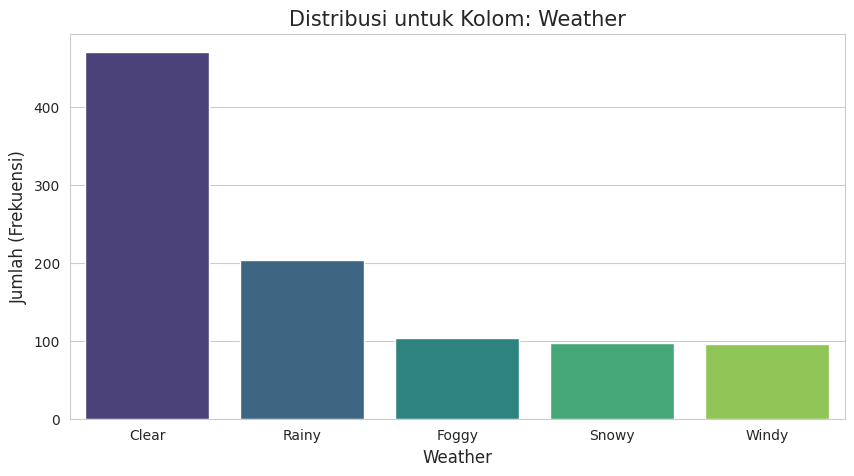

/tmp/ipython-input-1149389227.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='viridis')


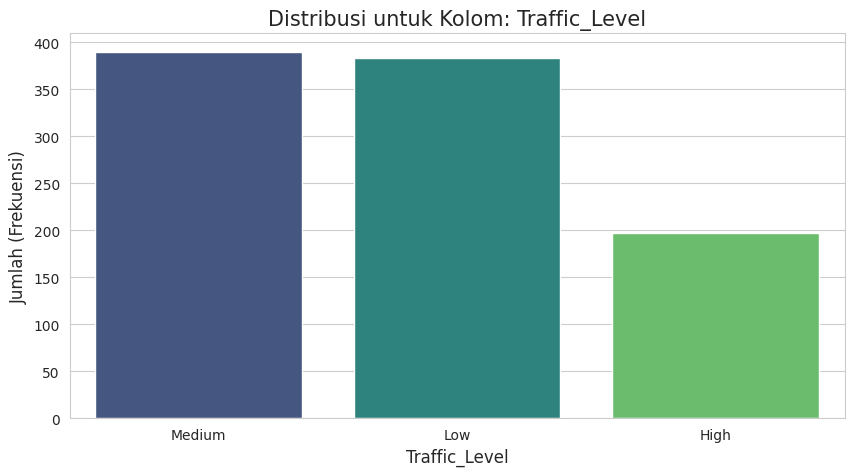

/tmp/ipython-input-1149389227.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='viridis')


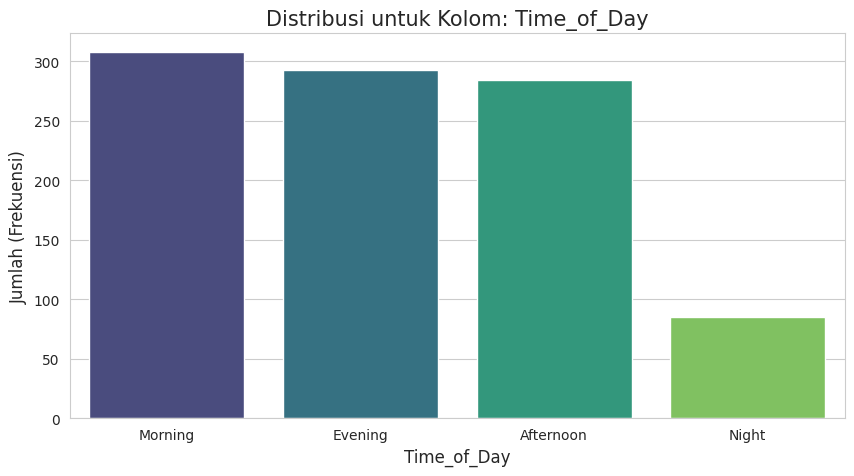

In [6]:
# Visualisasi missing value kolom kateogrikal
categorical_cols_to_plot = ['Weather', 'Traffic_Level', 'Time_of_Day']

print("Visualisasi Distribusi untuk Kolom Kategorikal:\n")

for column in categorical_cols_to_plot:
  plt.figure(figsize=(10, 5))

  sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='viridis')

  plt.title(f'Distribusi untuk Kolom: {column}', fontsize=15)
  plt.xlabel(column, fontsize=12)
  plt.ylabel('Jumlah (Frekuensi)', fontsize=12)
  plt.show()
  print("\n" + "="*60 + "\n")

In [7]:
# Handling Missing value kolom Courier_Experience_yrs dengan median
median_experience = df['Courier_Experience_yrs'].median()
print(f"Nilai Median Pengalaman Kurir: {median_experience} tahun")

# Mengisi missing values dengan median
df['Courier_Experience_yrs'].fillna(median_experience, inplace=True)

print("Missing values di 'Courier_Experience_yrs' berhasil diisi dengan median.")

Nilai Median Pengalaman Kurir: 5.0 tahun
Missing values di 'Courier_Experience_yrs' berhasil diisi dengan median.


/tmp/ipython-input-277941243.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Courier_Experience_yrs'].fillna(median_experience, inplace=True)


In [8]:
# hadnling Missing value Kategorikal
mode_weather = df['Weather'].mode()[0]
mode_traffic = df['Traffic_Level'].mode()[0]
mode_time = df['Time_of_Day'].mode()[0]

print(f"Modus untuk Weather: '{mode_weather}'")
print(f"Modus untuk Traffic_Level: '{mode_traffic}'")
print(f"Modus untuk Time_of_Day: '{mode_time}'")

# Mengisi missing values dengan modus masing-masing kolom
df['Weather'].fillna(mode_weather, inplace=True)
df['Traffic_Level'].fillna(mode_traffic, inplace=True)
df['Time_of_Day'].fillna(mode_time, inplace=True)

print("\n Missing values di kolom kategorikal berhasil diisi dengan modus.")

Modus untuk Weather: 'Clear'
Modus untuk Traffic_Level: 'Medium'
Modus untuk Time_of_Day: 'Morning'

 Missing values di kolom kategorikal berhasil diisi dengan modus.


/tmp/ipython-input-3679004811.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather'].fillna(mode_weather, inplace=True)
/tmp/ipython-input-3679004811.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [9]:
# Cek ulang informasi dataset setelah imputasi
print("Informasi Dataset Setelah Pembersihan:")
df.info()

# Menampilkan statistik deskriptif untuk kolom numerik
print("Statistik Deskriptif:")
display(df.describe())

Informasi Dataset Setelah Pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB
Statistik Deskriptif:


,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.592000,56.732000
std,288.819436,5.696656,7.204553,2.871198,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


# EDA

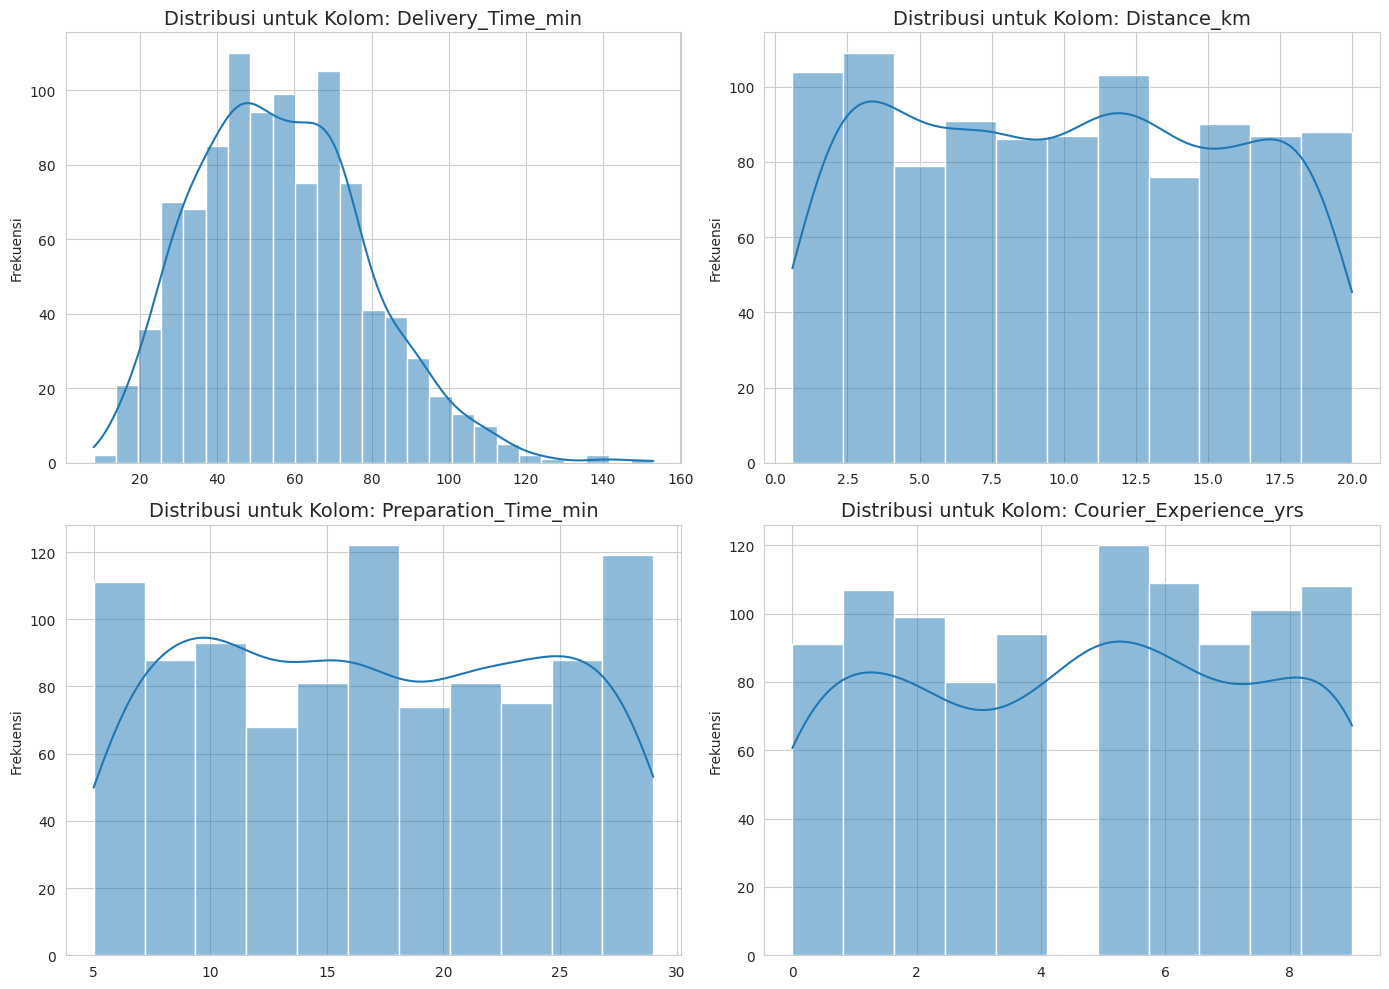

In [10]:
numerical_cols = ['Delivery_Time_min', 'Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()


for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribusi untuk Kolom: {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frekuensi')
plt.tight_layout()
plt.show()

* Numerical Features
    * Delivery_Time_min: Distribusinya condong ke kanan (right-skewed). Artinya, mayoritas pengiriman selesai dalam waktu "normal", namun ada sebagian kecil pengiriman yang mengalami keterlambatan ekstrem.

    * Distance_km: Distribusinya cenderung seragam (uniform), menunjukkan dataset kita memiliki cakupan jarak yang seimbang antara dekat, menengah, dan jauh.

    * Preparation_Time_min: Distribusinya multimodal (memiliki beberapa puncak), yang mengindikasikan kemungkinan adanya beberapa tipe pesanan (misalnya: cepat, standar, kompleks).

    * Courier_Experience_yrs: Distribusinya juga cenderung seragam, artinya kita memiliki sampel kurir yang seimbang dari berbagai tingkat pengalaman.

/tmp/ipython-input-1234420507.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index, palette='pastel')
/tmp/ipython-input-1234420507.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index, palette='pastel')
/tmp/ipython-input-1234420507.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index, palette='pastel')
/tmp/ipython-input-1234420507.py:9: FutureWarning

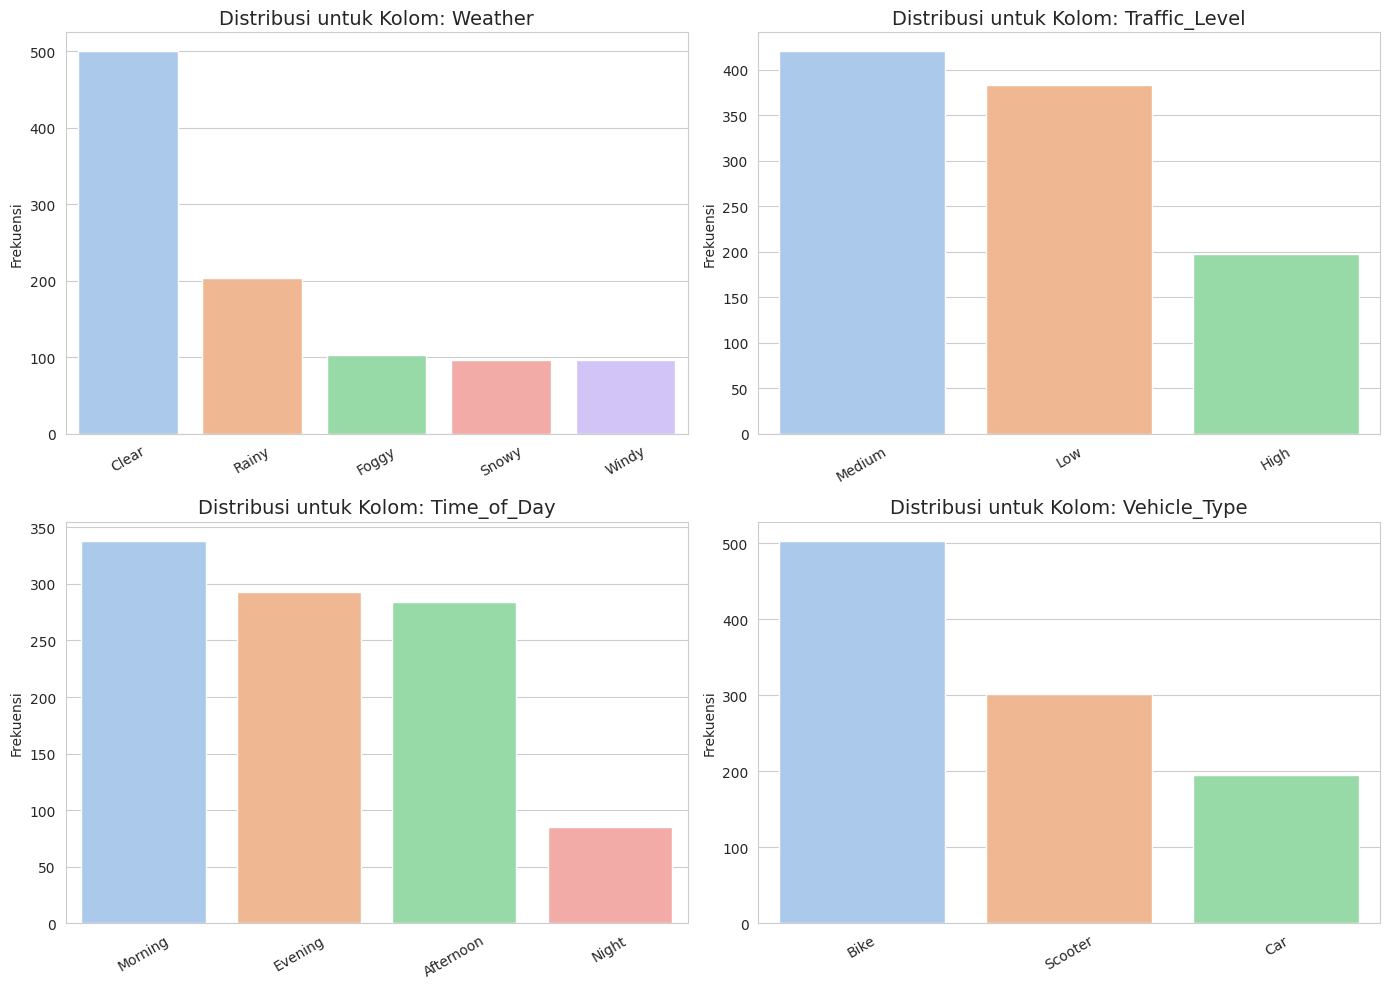

In [11]:
categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

# Setup figure dan axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

# Loop tiap kolom kategorikal dan buat countplot
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index, palette='pastel')
    axes[i].set_title(f'Distribusi untuk Kolom: {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frekuensi')
    axes[i].tick_params(axis='x', rotation=30)  # Rotate agar label tidak tumpang tindih

plt.tight_layout()
plt.show()

* Weather: Kategori yang paling sering muncul (modus) adalah 'Clear'. Kategori 'Rainy' adalah yang kedua paling sering, namun 'Clear' jauh lebih dominan.
* Traffic_Level: Kategori yang paling sering muncul adalah 'Medium', bukan 'Low'.
* Time_of_Day: Kategori yang paling sering muncul adalah 'Morning'.
* Vehicle_Type: Jumlah kendaraan tidak seimbang. Kendaraan yang paling sering digunakan adalah 'Bike'.

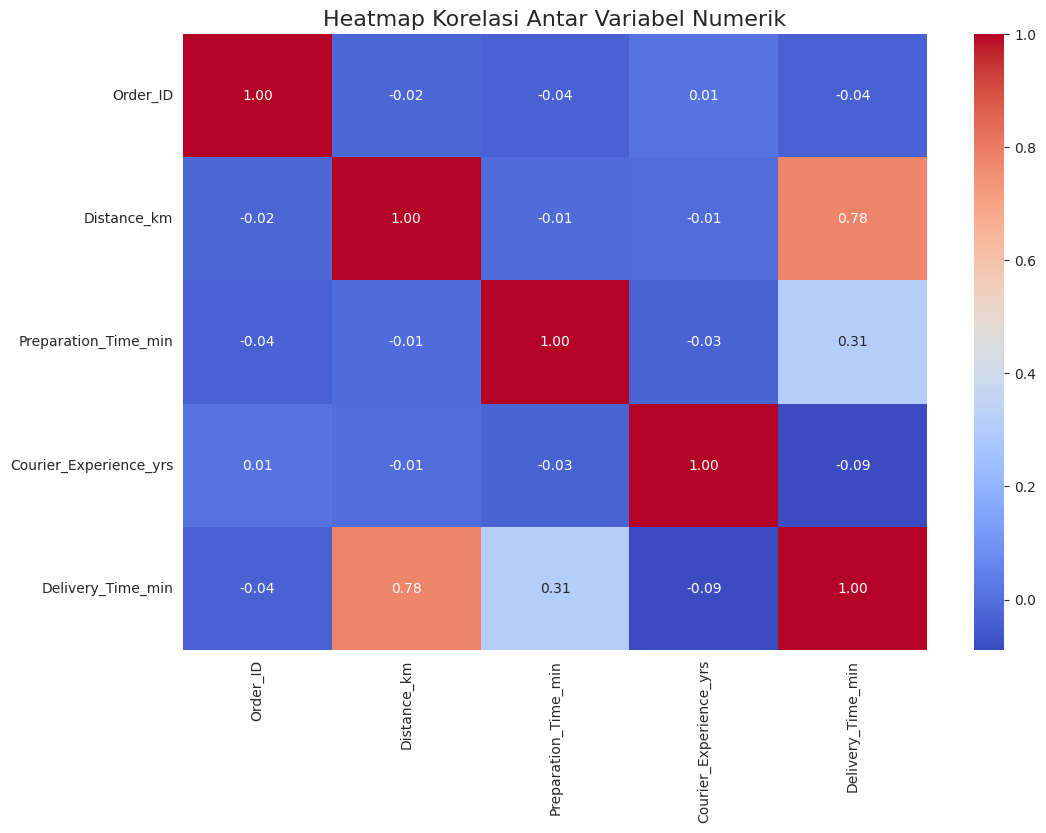

In [12]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True) # Hanya menghitung korelasi untuk kolom numerik
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel Numerik', fontsize=16)
plt.show()

Jarak Tempuh adalah Faktor Paling Mempengaruhi
* Korelasi kuat antara Distance_km dan Delivery_Time_min (r = 0.78).
* Artinya: Semakin jauh jarak pengiriman, semakin lama waktu yang dibutuhkan.
* Fitur ini kemungkinan besar akan menjadi prediktor utama dalam modeling.

Waktu Persiapan Berpengaruh Secara Moderat
* Korelasi positif lemah antara Preparation_Time_min dan Delivery_Time_min (r = 0.31).
* Artinya: Meski berkontribusi, durasi persiapan tidak terlalu menentukan keseluruhan waktu pengiriman.

Pengalaman Kurir Hampir Tidak Berpengaruh

Order ID = Tidak Relevan

## Jarak Adalah Penentu Utama Waktu Pengiriman

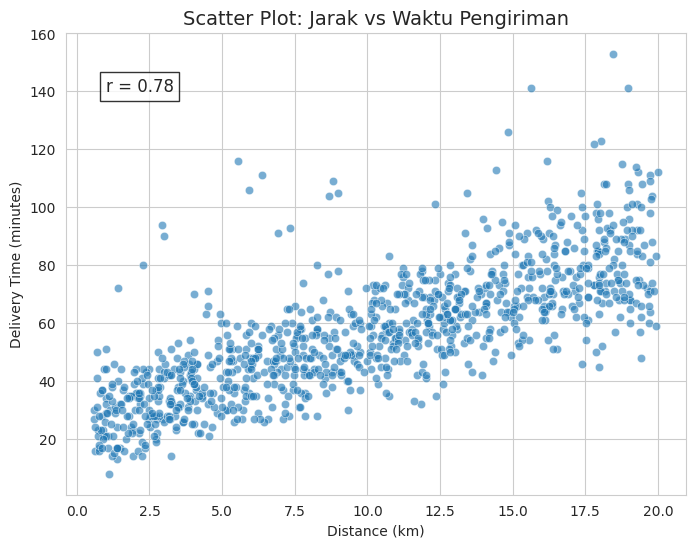

In [13]:
# Scatter plot antara Distance_km dan Delivery_Time_min.
# Hitung korelasi Pearson
corr_value = df['Distance_km'].corr(df['Delivery_Time_min'])

# Plot scatter
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Distance_km',
    y='Delivery_Time_min',
    alpha=0.6
)

# Judul dan label
plt.title('Scatter Plot: Jarak vs Waktu Pengiriman', fontsize=14)
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (minutes)')

# Tambahkan anotasi nilai korelasi
plt.text(
    1, 140,  # posisi x, y untuk teks
    f'r = {corr_value:.2f}',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black')
)

plt.show()

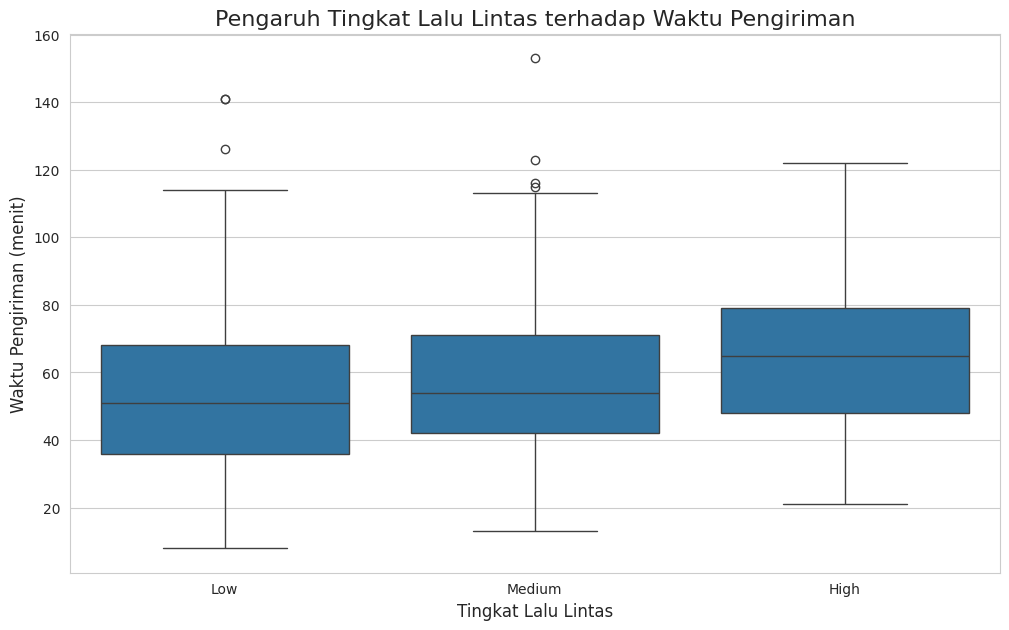

In [14]:
# Membuat boxplot untuk melihat hubungan Traffic_Level dengan Delivery_Time_min
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Traffic_Level', y='Delivery_Time_min', order=['Low', 'Medium', 'High']) # Mengurutkan order agar logis
plt.title('Pengaruh Tingkat Lalu Lintas terhadap Waktu Pengiriman', fontsize=16)
plt.xlabel('Tingkat Lalu Lintas', fontsize=12)
plt.ylabel('Waktu Pengiriman (menit)', fontsize=12)
plt.show()

* Waktu Pengiriman Cenderung Naik saat Lalu Lintas Padat
  * Median waktu pengiriman:
    * Low traffic: ~50 menit
    * Medium traffic: ~55 menit
    * High traffic: ~65 menit
  * Ada kenaikan jelas saat traffic dari Medium → High.
* Variabilitas Waktu Meningkat pada Lalu Lintas Padat
  * Box (IQR) dan whisker semakin melebar di kategori High.
  * Artinya: Waktu pengiriman saat traffic padat jadi lebih lama dan tidak konsisten, menyulitkan estimasi.

* Outlier pada low dan mediumm,  ada kasus dimana pegiriman memakan waktu sangat lama (lebih dari 120 menit) meskipun kondisi lalu lintas sedang lancar atau sedang. Berarti ada faktor lain yang menyebabkan keterlambatan ekstrem selain lalu lintas (misalnya: kurir tersesat, pesanan salah, atau masalah di restoran).

Kesimpulan:
Tingkat lalu lintas memiliki korelasi kuat terhadap waktu pengiriman. Namun, untuk estimasi yang akurat, fitur-fitur lain seperti jarak dan cuaca juga perlu dipertimbangkan dalam model prediksi.

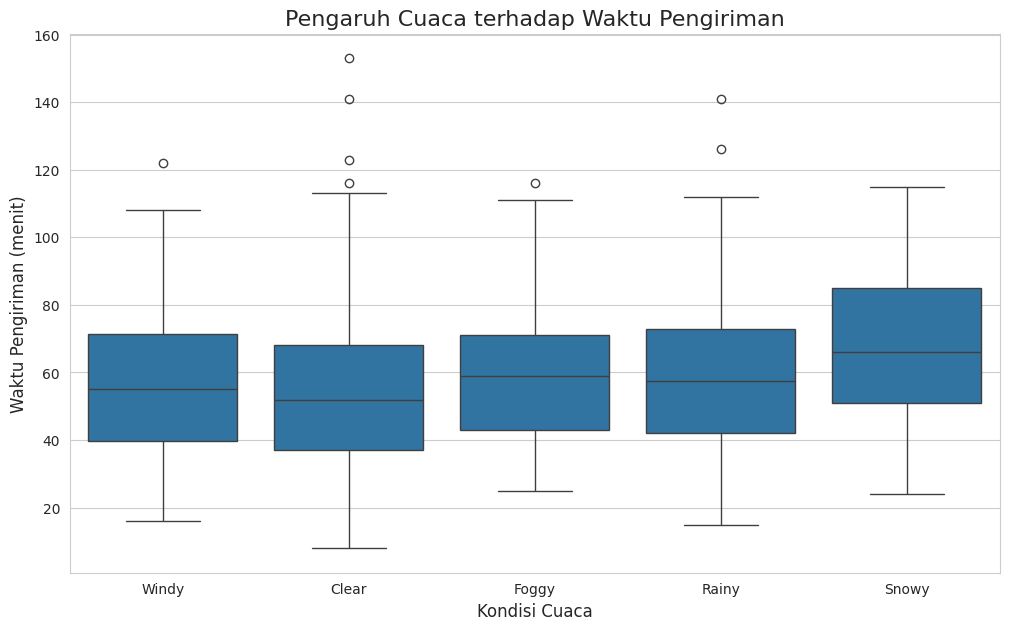

In [15]:
# Analisis untuk kolom Weather
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Weather', y='Delivery_Time_min')
plt.title('Pengaruh Cuaca terhadap Waktu Pengiriman', fontsize=16)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Waktu Pengiriman (menit)', fontsize=12)
plt.show()

## Dua Rintangan Utama: Lalu Lintas Padat & Cuaca Bersalju

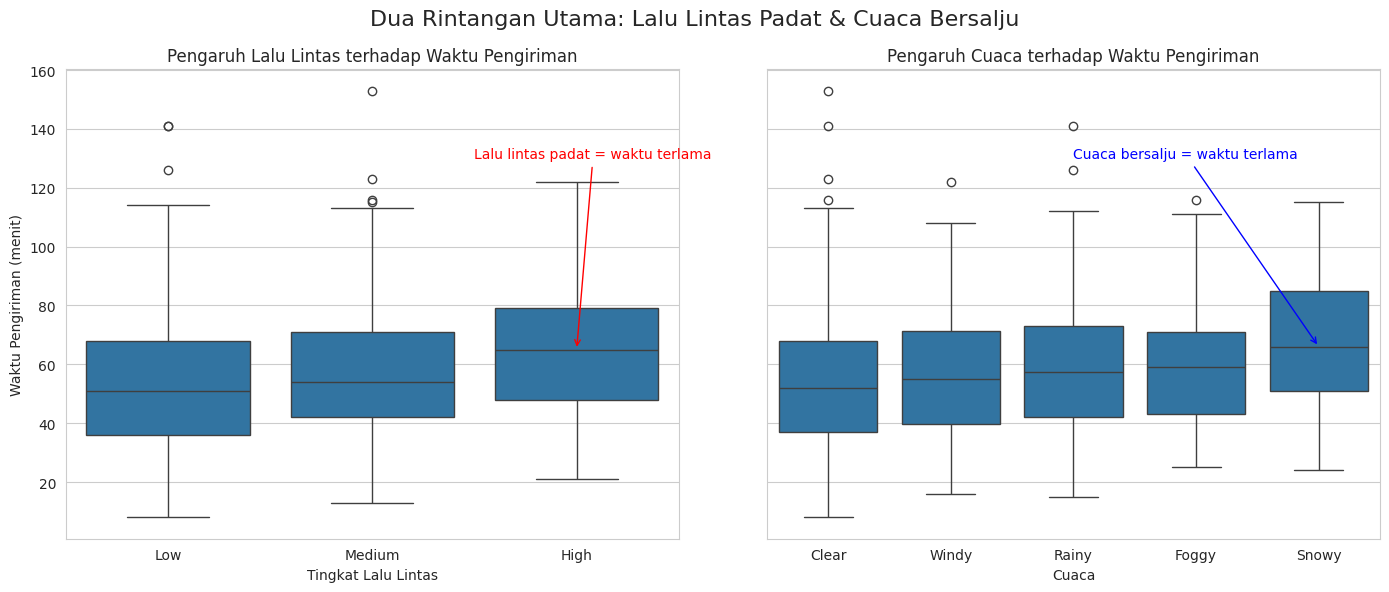

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Boxplot Traffic Level
sns.boxplot(data=df, x='Traffic_Level', y='Delivery_Time_min',
            order=['Low', 'Medium', 'High'], ax=axes[0])
axes[0].set_title('Pengaruh Lalu Lintas terhadap Waktu Pengiriman')
axes[0].set_xlabel('Tingkat Lalu Lintas')
axes[0].set_ylabel('Waktu Pengiriman (menit)')

# Sorot 'High' dengan panah merah
axes[0].annotate('Lalu lintas padat = waktu terlama',
                 xy=(2, df[df['Traffic_Level']=='High']['Delivery_Time_min'].median()),
                 xytext=(1.5, 130),
                 arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='->'),
                 fontsize=10, color='red')

# Boxplot Weather
sns.boxplot(data=df, x='Weather', y='Delivery_Time_min',
            order=df.groupby('Weather')['Delivery_Time_min'].median().sort_values().index,
            ax=axes[1])
axes[1].set_title('Pengaruh Cuaca terhadap Waktu Pengiriman')
axes[1].set_xlabel('Cuaca')
axes[1].set_ylabel('')

# Sorot 'Snowy' dengan panah biru
axes[1].annotate('Cuaca bersalju = waktu terlama',
                 xy=(list(df['Weather'].unique()).index('Snowy'),
                     df[df['Weather']=='Snowy']['Delivery_Time_min'].median()),
                 xytext=(2, 130),
                 arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='->'),
                 fontsize=10, color='blue')

plt.suptitle('Dua Rintangan Utama: Lalu Lintas Padat & Cuaca Bersalju', fontsize=16)
plt.tight_layout()
plt.show()


* Cuaca Bersalju ini yang palaing beda
  * Boxplot untuk kondisi 'Snowy' secara jelas berada di posisi yang lebih tinggi dibandingkan dengan empat kondisi cuaca lainnya. Median waktunya sekitar 65-70 menit.
  * Artinya: Cuaca bersalju memiliki dampak paling signifikan dalam memperlambat waktu pengiriman. Tidak hanya lebih lama secara rata-rata, rentang waktunya (ukuran box) juga cenderung lebih lebar, artinya lebih sulit diprediksi.

* Distribusi waktu pengiriman untuk kondisi 'Windy', 'Clear', 'Foggy', dan 'Rainy' terlihat hampir identik.
* Artinya: Ini temuan yang menarik! Berlawanan dengan intuisi, ternyata hujan, kabut, atau angin tidak memberikan pengaruh perlambatan yang berarti dibandingkan saat cuaca cerah. Dari sudut pandang operasional, keempat kondisi ini bisa dianggap sebagai kondisi "standar".

* Pola Outlier
  * Sama seperti pada plot lalu lintas, kita kembali melihat adanya outlier (keterlambatan ekstrem) pada semua kondisi cuaca non-salju.
  * Artinya: Ini semakin memperkuat hipotesis kita bahwa ada penyebab lain di luar faktor lingkungan (cuaca, lalu lintas) yang bisa menyebabkan pengiriman menjadi sangat lama.

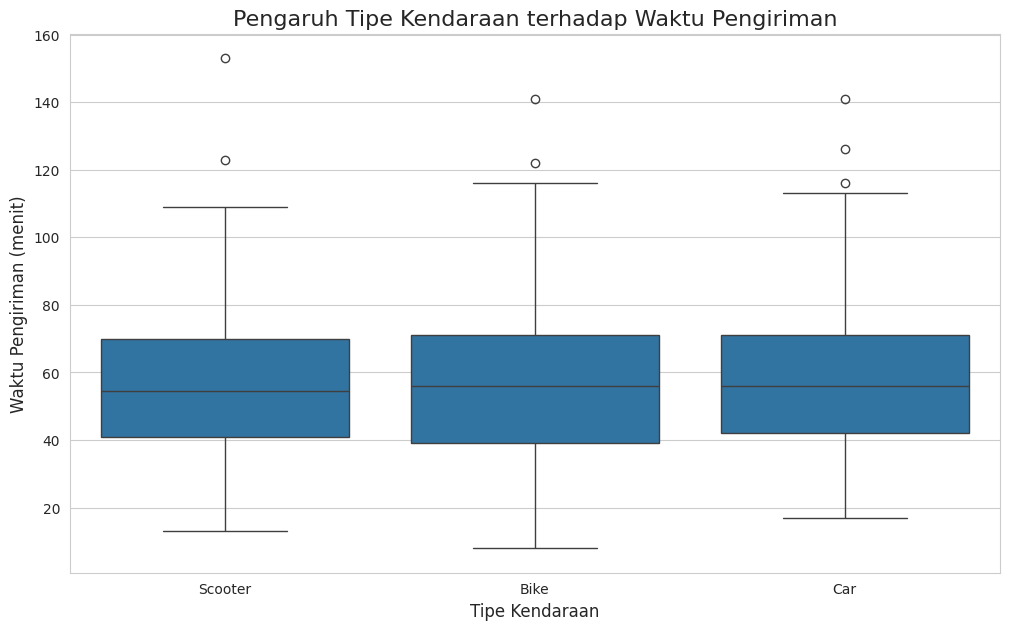

In [17]:
# Analisis untuk kolom Vehicle_Type
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Vehicle_Type', y='Delivery_Time_min')
plt.title('Pengaruh Tipe Kendaraan terhadap Waktu Pengiriman', fontsize=16)
plt.xlabel('Tipe Kendaraan', fontsize=12)
plt.ylabel('Waktu Pengiriman (menit)', fontsize=12)
plt.show()

* Analisis Boxplot Tipe Kendaraan (Vehicle_Type)
  * Ketiga boxplot untuk 'Scooter', 'Bike', dan 'Car' terlihat hampir identik. Garis median, ukuran kotak (IQR), dan jangkauan "kumis" (whisker) semuanya berada pada level yang sangat mirip.
  * Artinya: Ini adalah temuan yang sangat jelas dan mungkin sedikit mengejutkan. Berdasarkan data ini, tidak ada perbedaan yang signifikan dalam waktu pengiriman antar jenis kendaraan. Baik menggunakan skuter, sepeda, maupun mobil, distribusi waktu pengirimannya relatif sama. Ini bisa berarti faktor lain seperti jarak dan lalu lintas jauh lebih dominan sehingga meniadakan potensi perbedaan kecepatan antar kendaraan.

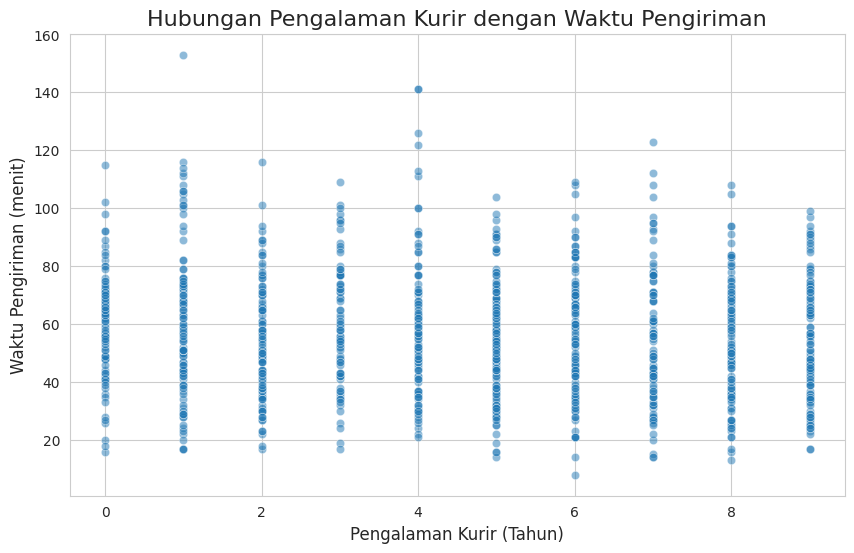

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Courier_Experience_yrs', y='Delivery_Time_min', alpha=0.5)
plt.title('Hubungan Pengalaman Kurir dengan Waktu Pengiriman', fontsize=16)
plt.xlabel('Pengalaman Kurir (Tahun)', fontsize=12)
plt.ylabel('Waktu Pengiriman (menit)', fontsize=12)
plt.show()

Ini adalah konfirmasi visual dari nilai korelasi (-0.09) yang udah di lihat pada heatmap, yang artinya tidak ada hubungan linear antara pengalaman kurir dan waktu pengiriman.

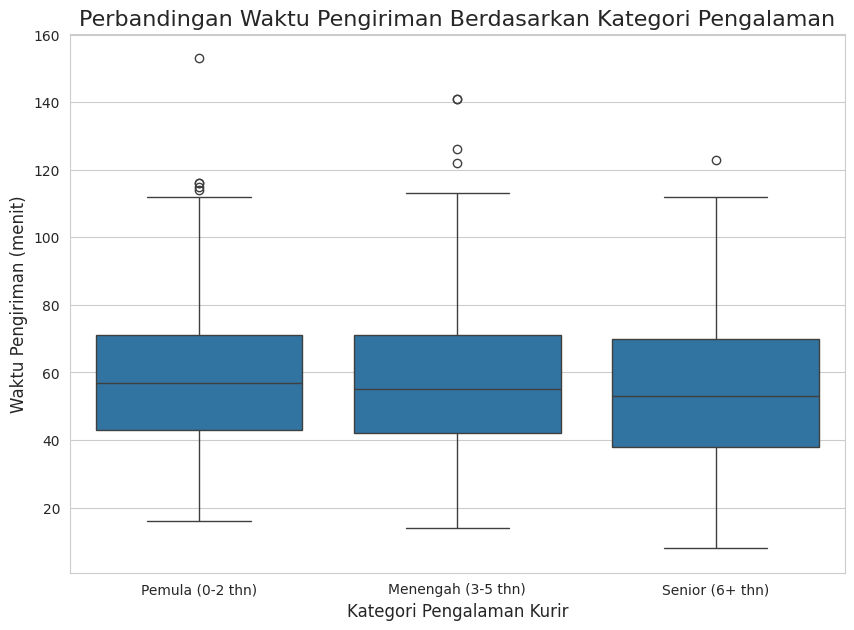

In [19]:
bins = [-1, 2, 5, 10]
labels = ['Pemula (0-2 thn)', 'Menengah (3-5 thn)', 'Senior (6+ thn)']
df['Experience_Category'] = pd.cut(df['Courier_Experience_yrs'], bins=bins, labels=labels, right=True)

# Membuat boxplot dari kategori yang baru dibuat
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='Experience_Category', y='Delivery_Time_min')
plt.title('Perbandingan Waktu Pengiriman Berdasarkan Kategori Pengalaman', fontsize=16)
plt.xlabel('Kategori Pengalaman Kurir', fontsize=12)
plt.ylabel('Waktu Pengiriman (menit)', fontsize=12)
plt.show()

* Tidak Ada Perbedaan Performa: Kotak untuk kategori 'Pemula', 'Menengah', dan 'Senior' terlihat hampir identik.

* Median yang Sama: Garis median (waktu tengah pengiriman) untuk ketiga grup berada pada level yang sama.

* Sebaran yang Mirip: Ukuran kotak (IQR) dan jangkauan "kumis" juga sangat mirip, menunjukkan bahwa variasi waktu pengiriman tidak berbeda antar grup.

## Faktor yang Ternyata Tidak Berpengaruh Signifikan

/tmp/ipython-input-1388489623.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1388489623.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


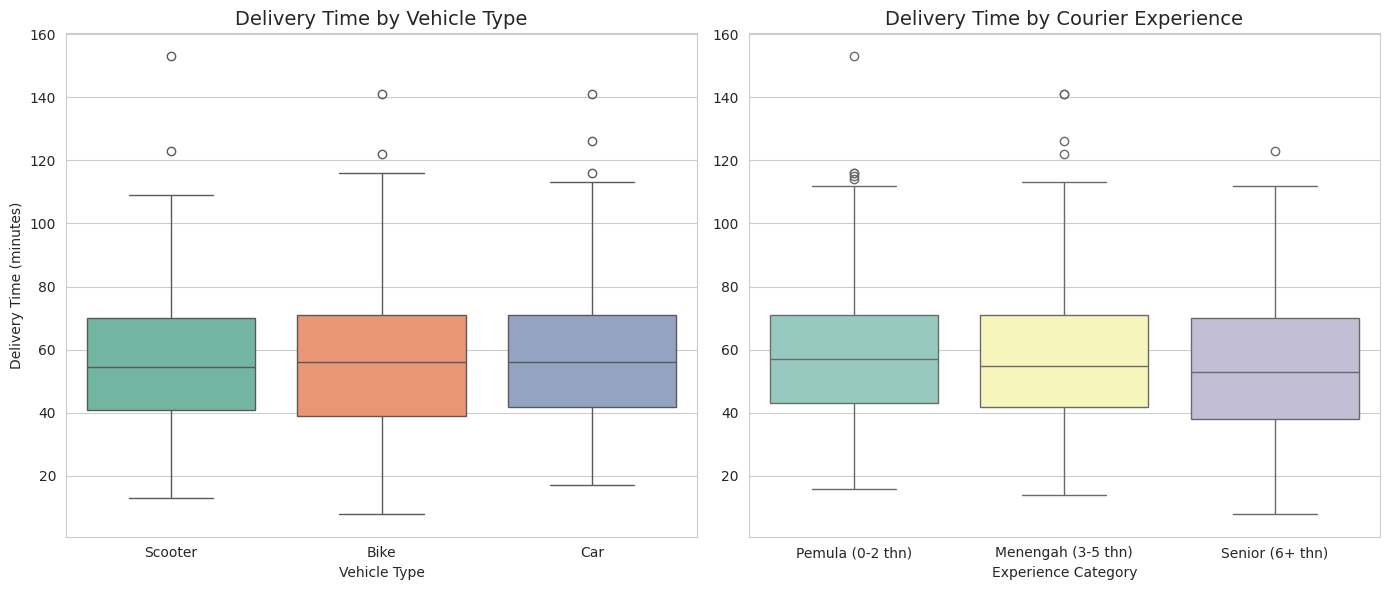

In [20]:
# Buat subplot dengan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot 1: Vehicle Type
sns.boxplot(
    data=df,
    x='Vehicle_Type',
    y='Delivery_Time_min',
    palette='Set2',
    ax=axes[0]
)
axes[0].set_title('Delivery Time by Vehicle Type', fontsize=14)
axes[0].set_xlabel('Vehicle Type')
axes[0].set_ylabel('Delivery Time (minutes)')

# Boxplot 2: Experience Category
sns.boxplot(
    data=df,
    x='Experience_Category',
    y='Delivery_Time_min',
    palette='Set3',
    ax=axes[1]
)
axes[1].set_title('Delivery Time by Courier Experience', fontsize=14)
axes[1].set_xlabel('Experience Category')
axes[1].set_ylabel('')

# Rapiin layout
plt.tight_layout()
plt.show()

## Pengaruh Waktu terhadap Waktu Pengiriman

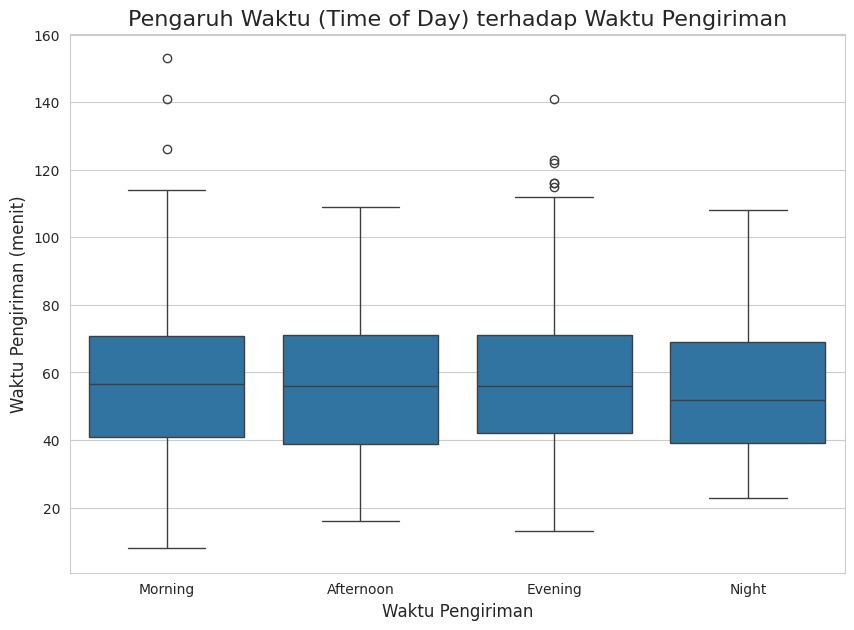

In [21]:
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']

# Membuat boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='Time_of_Day', y='Delivery_Time_min', order=time_order)

plt.title('Pengaruh Waktu (Time of Day) terhadap Waktu Pengiriman', fontsize=16)
plt.xlabel('Waktu Pengiriman', fontsize=12)
plt.ylabel('Waktu Pengiriman (menit)', fontsize=12)
plt.show()

* Tidak Ada Perbedaan Signifikan: Hal yang paling menonjol dari plot ini adalah betapa miripnya keempat boxplot tersebut. Median (garis tengah), ukuran kotak (sebaran 50% data), dan jangkauan "kumis"-nya hampir identik untuk 'Morning', 'Afternoon', 'Evening', dan 'Night'.
* Implikasi Bisnis: Ini adalah insight yang sangat berharga. Artinya, berdasarkan data ini, waktu (pagi/siang/sore/malam) bukanlah faktor penentu yang signifikan dalam durasi pengiriman. Mungkin kita berekspektasi pagi atau malam hari akan lebih lambat karena jam sibuk, namun data menunjukkan performa pengiriman relatif konsisten sepanjang hari.

## Rata-Rata Waktu Pengiriman berdasarkan Lalu Lintas & Cuaca

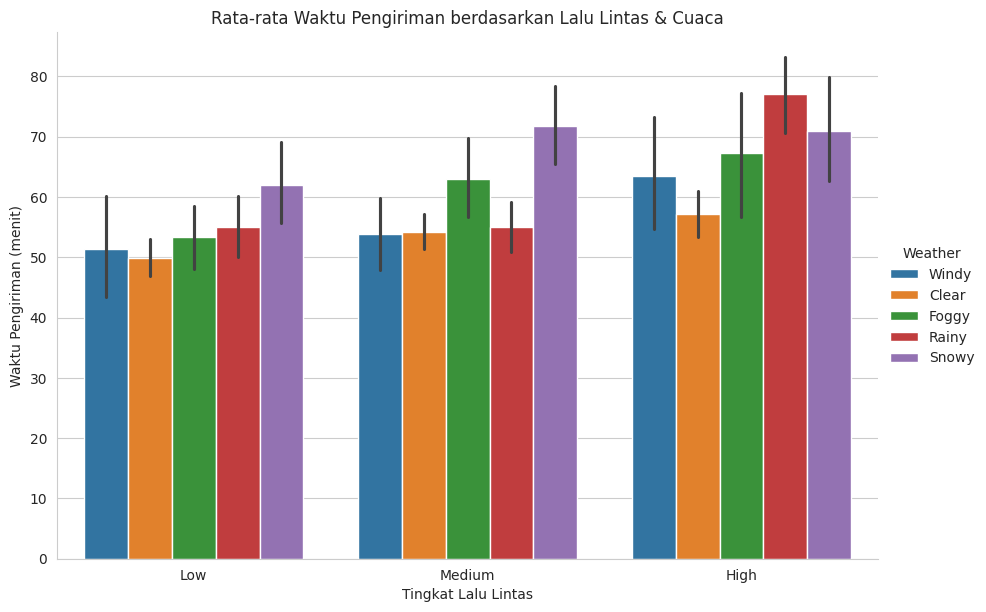

In [22]:
sns.catplot(
    data=df,
    x='Traffic_Level',
    y='Delivery_Time_min',
    hue='Weather',
    kind='bar',
    height=6,
    aspect=1.5,
    order=['Low', 'Medium', 'High']
)
plt.title('Rata-rata Waktu Pengiriman berdasarkan Lalu Lintas & Cuaca')
plt.xlabel('Tingkat Lalu Lintas')
plt.ylabel('Waktu Pengiriman (menit)')
plt.show()

/tmp/ipython-input-3631618047.py:14: UserWarning: The palette list has more values (15) than needed (5), which may not be intended.
  sns.barplot(


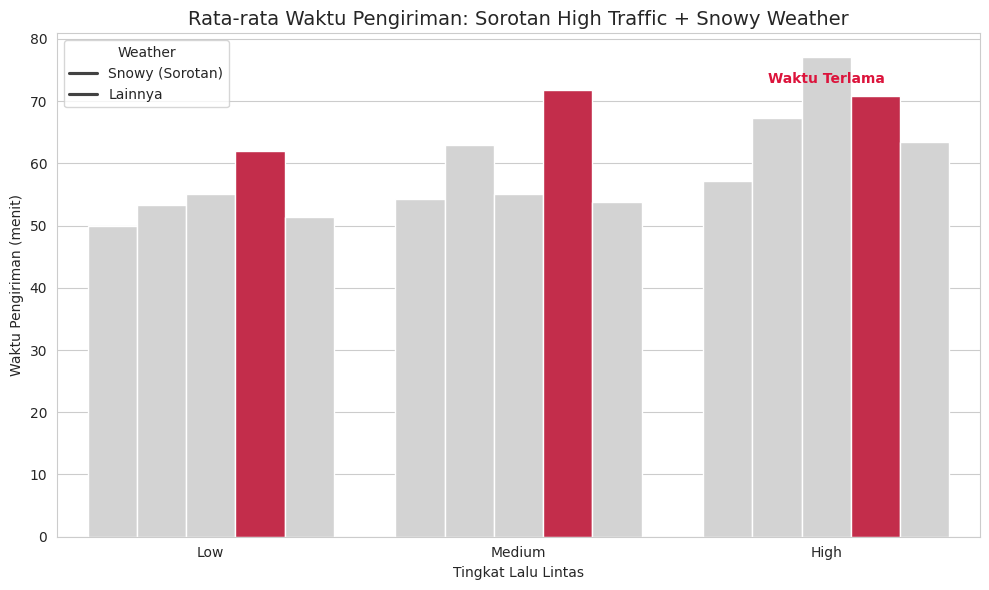

In [23]:
# Hitung rata-rata waktu pengiriman untuk setiap kombinasi Traffic_Level dan Weather
avg_times = df.groupby(['Traffic_Level', 'Weather'])['Delivery_Time_min'].mean().reset_index()

# Tentukan warna default (netral) dan warna highlight untuk High+Snowy
colors = []
for _, row in avg_times.iterrows():
    if row['Traffic_Level'] == 'High' and row['Weather'] == 'Snowy':
        colors.append('crimson')  # Sorotan merah terang
    else:
        colors.append('lightgray')  # Warna netral

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_times,
    x='Traffic_Level',
    y='Delivery_Time_min',
    hue='Weather',
    palette=colors,
    order=['Low', 'Medium', 'High'],
    dodge=True
)

# Tambahkan anotasi pada bar High+Snowy
highlight_value = avg_times[
    (avg_times['Traffic_Level'] == 'High') & (avg_times['Weather'] == 'Snowy')
]['Delivery_Time_min'].values[0]

plt.text(
    x=2,  # posisi x untuk 'High'
    y=highlight_value + 2,
    s="Waktu Terlama",
    color='crimson',
    ha='center',
    fontweight='bold'
)

# Judul dan label
plt.title('Rata-rata Waktu Pengiriman: Sorotan High Traffic + Snowy Weather', fontsize=14)
plt.xlabel('Tingkat Lalu Lintas')
plt.ylabel('Waktu Pengiriman (menit)')

# Hilangkan legend default dan buat legend manual
plt.legend(
    title="Weather",
    labels=['Snowy (Sorotan)', 'Lainnya'],
    loc='upper left'
)

plt.tight_layout()
plt.show()

# Kesimpulan EDA

* Faktor Paling Dominan: Jarak (Distance_km) adalah prediktor terkuat untuk waktu pengiriman. Hubungannya lurus dan kuat.
* Faktor Pemberat Signifikan: Kondisi eksternal seperti Lalu Lintas 'High' dan Cuaca 'Snowy' secara signifikan menambah durasi dan variabilitas waktu pengiriman.
* Faktor yang Kurang Berpengaruh: Ternyata, Pengalaman Kurir, Tipe Kendaraan, dan sebagian besar kondisi cuaca (selain salju) memiliki pengaruh yang sangat kecil terhadap waktu pengiriman.
* Temuan Misterius: Adanya keterlambatan ekstrem (outliers) bahkan dalam kondisi lalu lintas dan cuaca yang ideal menunjukkan ada masalah operasional lain yang tidak terekam dalam data ini yang perlu diselidiki.
* Pengalaman kurir bukanlah faktor yang signifikan dalam menentukan cepat atau lambatnya waktu pengiriman dalam dataset ini.

# Coba Identifikasi Outlier yang ada

In [24]:
# Menentukan ambang batas 2% teratas (persentile ke-98)
percentile_98 = df['Delivery_Time_min'].quantile(0.98)
print(f"Ambang batas waktu untuk 2% pengiriman terlama adalah: {percentile_98:.2f} menit")

# Membuat DataFrame baru yang hanya berisi para outlier (2% terlama)
df_outliers = df[df['Delivery_Time_min'] >= percentile_98]

print(f"Jumlah kasus outlier yang akan kita analisis: {len(df_outliers)} pengiriman")
display(df_outliers.head())

Ambang batas waktu untuk 2% pengiriman terlama adalah: 108.00 menit
Jumlah kasus outlier yang akan kita analisis: 21 pengiriman


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Experience_Category
29,948,18.05,Clear,Medium,Evening,Scooter,10,7.0,123,Senior (6+ thn)
31,140,19.45,Rainy,High,Morning,Scooter,20,6.0,108,Senior (6+ thn)
33,500,19.73,Foggy,Medium,Evening,Bike,27,4.0,111,Menengah (3-5 thn)
73,742,6.38,Snowy,Low,Evening,Bike,16,1.0,111,Pemula (0-2 thn)
127,446,18.97,Clear,Low,Evening,Car,25,4.0,141,Menengah (3-5 thn)


In [25]:
# Menampilkan statistik deskriptif dari para outlier
print("Statistik Deskriptif untuk Grup Outlier:")
display(df_outliers.describe())

print("Statistik Deskriptif:")
display(df.describe())

Statistik Deskriptif untuk Grup Outlier:


,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,412.476190,16.507619,20.238095,3.619048,117.904762
std,266.565118,4.342454,5.656012,2.479439,12.605177
min,45.000000,5.550000,10.000000,0.000000,108.000000
25%,155.000000,15.640000,17.000000,1.000000,109.000000
50%,394.000000,18.200000,20.000000,4.000000,113.000000
75%,532.000000,19.240000,25.000000,6.000000,122.000000
max,948.000000,19.990000,29.000000,8.000000,153.000000


Statistik Deskriptif:


,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.592000,56.732000
std,288.819436,5.696656,7.204553,2.871198,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


* Waktu Pengiriman (Delivery_Time_min)
  * Observasi: Rata-rata waktu pengiriman untuk grup outlier adalah 117.9 menit, lebih dari dua kali lipat rata-rata keseluruhan yang hanya 56.7 menit. Bahkan, pengiriman tercepat di grup outlier (108 menit) masih jauh lebih lama dari 75% pengiriman lainnya (71 menit).
  * Artinya: Perbedaan ini menegaskan bahwa kelompok outlier yang kita pilih memang benar-benar merupakan kasus-kasus yang ekstrem.

* Jarak (Distance_km)
  * Observasi: Rata-rata jarak untuk grup outlier adalah 16.5 km, sementara rata-rata keseluruhan hanya 10.1 km.
  * Artinya: Ini adalah temuan kunci. Pengiriman yang mengalami keterlambatan parah, secara rata-rata, menempuh jarak yang jauh lebih signifikan (sekitar 64% lebih jauh).

* Waktu Persiapan (Preparation_Time_min)
  * Observasi: Rata-rata waktu persiapan untuk outlier adalah 20.2 menit, sedikit lebih tinggi dari rata-rata keseluruhan 17.0 menit.
  * Artinya: Waktu persiapan yang lebih lama memang berkontribusi, namun perbedaannya tidak sedramatis perbedaan jarak. Ini скорее faktor sekunder.

* Pengalaman Kurir (Courier_Experience_yrs)
  * Observasi: Rata-rata pengalaman kurir di grup outlier (3.6 tahun) sedikit lebih rendah dari rata-rata keseluruhan (4.6 tahun).
  * Artinya: Meskipun sedikit lebih rendah, perbedaannya tidak besar. Ini mengkonfirmasi kembali bahwa pengalaman kurir bukanlah faktor penentu utama dalam mencegah keterlambatan ekstrem.

In [26]:
# Menganalisis distribusi kategorikal dari para outlier
categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type', 'Experience_Category']

print("\nDistribusi Kategorikal untuk Grup Outlier:")
for col in categorical_cols:
    print(f"\n----- {col} -----")
    # normalize=True untuk melihat dalam bentuk persentase (%)
    print(df_outliers[col].value_counts(normalize=True).apply(lambda x: f"{x:.1%}"))


Distribusi Kategorikal untuk Grup Outlier:

----- Weather -----
Weather
Rainy    38.1%
Clear    28.6%
Snowy    14.3%
Foggy     9.5%
Windy     9.5%
Name: proportion, dtype: object

----- Traffic_Level -----
Traffic_Level
Medium    38.1%
High      33.3%
Low       28.6%
Name: proportion, dtype: object

----- Time_of_Day -----
Time_of_Day
Evening      47.6%
Morning      42.9%
Night         4.8%
Afternoon     4.8%
Name: proportion, dtype: object

----- Vehicle_Type -----
Vehicle_Type
Bike       57.1%
Car        23.8%
Scooter    19.0%
Name: proportion, dtype: object

----- Experience_Category -----
Experience_Category
Pemula (0-2 thn)      38.1%
Menengah (3-5 thn)    33.3%
Senior (6+ thn)       28.6%
Name: proportion, dtype: object


* Weather
  * Observasi: Dalam grup outlier, cuaca yang paling sering muncul adalah 'Rainy' (38.1%), diikuti oleh 'Clear' (28.6%).
  * Insight: Ini adalah pergeseran penting. Di data keseluruhan, 'Clear' adalah yang paling umum. Ini menandakan bahwa cuaca hujan memiliki porsi yang lebih besar dalam kasus-kasus pengiriman yang sangat lambat.
* Traffic_Level
  * Observasi: 'Medium' (38.1%) dan 'High' (33.3%) mendominasi grup outlier.
  * Insight: Porsi 'High' traffic di sini jauh lebih besar daripada di data keseluruhan (di mana 'High' adalah yang paling jarang). Ini mengkonfirmasi bahwa lalu lintas padat adalah kontributor kuat untuk keterlambatan ekstrem.
* Time_of_Day
  * Observasi: 'Evening' (47.6%) menjadi waktu yang paling dominan untuk kasus outlier, diikuti oleh 'Morning' (42.9%).
  * Insight: Ini juga pergeseran yang signifikan dari data keseluruhan dimana 'Morning' adalah yang paling umum. Ini menunjukkan bahwa meskipun secara rata-rata waktu pengiriman sama, risiko keterlambatan parah lebih tinggi pada malam hari.
* Vehicle_Type dan Experience_Category
  * Observasi: Distribusi untuk kedua kategori ini di grup outlier cukup mirip dengan distribusi data secara keseluruhan. 'Bike' tetap yang paling umum, dan semua level pengalaman terwakili.
  * Insight: Ini semakin memperkuat kesimpulan kita bahwa tipe kendaraan dan pengalaman kurir bukanlah faktor penentu dalam kasus-kasus keterlambatan parah ini.

/tmp/ipython-input-3382109908.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=rainy_comparison_data, x='Grup', y='Persentase', palette=['skyblue', 'salmon'])


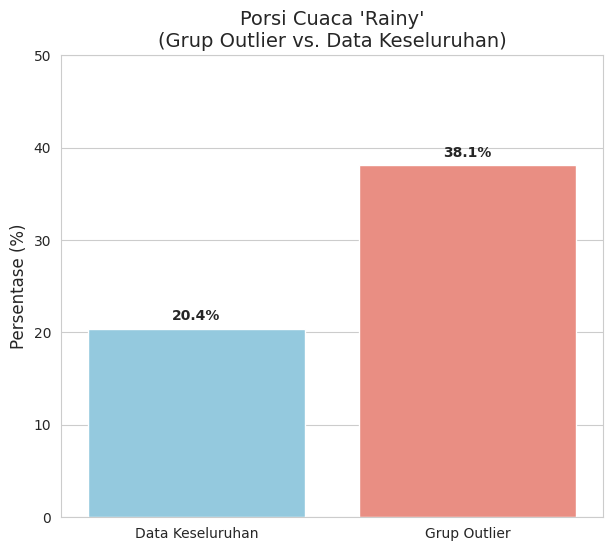

In [27]:
# Persentase 'Rainy' di data keseluruhan
rainy_overall_pct = (df['Weather'] == 'Rainy').sum() / len(df) * 100
# Persentase 'Rainy' di grup outlier
rainy_outlier_pct = (df_outliers['Weather'] == 'Rainy').sum() / len(df_outliers) * 100


# Data untuk Plotting
# Buat DataFrame kecil khusus untuk visualisasi ini
rainy_comparison_data = pd.DataFrame({
    'Grup': ['Data Keseluruhan', 'Grup Outlier'],
    'Persentase': [rainy_overall_pct, rainy_outlier_pct]
})


# Buat Visualisasi
plt.figure(figsize=(7, 6))
ax1 = sns.barplot(data=rainy_comparison_data, x='Grup', y='Persentase', palette=['skyblue', 'salmon'])

# Menambahkan judul dan label
ax1.set_title("Porsi Cuaca 'Rainy'\n(Grup Outlier vs. Data Keseluruhan)", fontsize=14)
ax1.set_ylabel("Persentase (%)", fontsize=12)
ax1.set_xlabel("")
ax1.set_ylim(0, 50) # Mengatur batas sumbu Y agar perbedaan lebih terlihat

# Menambahkan label angka di atas setiap bar
for p in ax1.patches:
    ax1.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points', weight='bold')

plt.show()

/tmp/ipython-input-712608942.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=evening_comparison_data, x='Grup', y='Persentase', palette=['skyblue', 'salmon'])


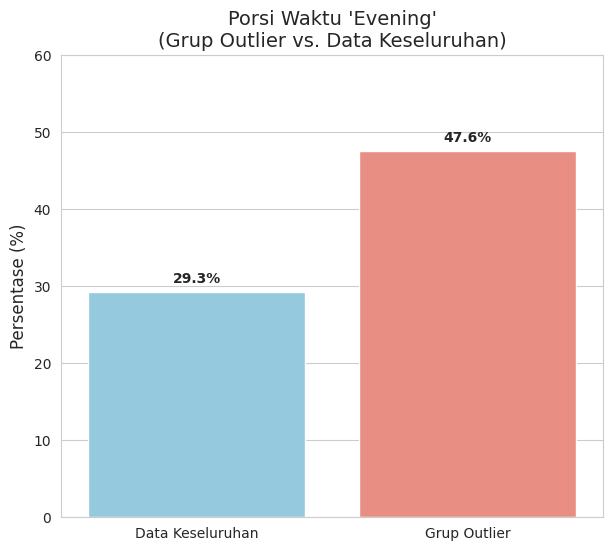

In [28]:
# Persentase 'Evening' di data keseluruhan
evening_overall_pct = (df['Time_of_Day'] == 'Evening').sum() / len(df) * 100
# Persentase 'Evening' di grup outlier
evening_outlier_pct = (df_outliers['Time_of_Day'] == 'Evening').sum() / len(df_outliers) * 100

# Data untuk Plotting
evening_comparison_data = pd.DataFrame({
    'Grup': ['Data Keseluruhan', 'Grup Outlier'],
    'Persentase': [evening_overall_pct, evening_outlier_pct]
})


# Visualisasi
plt.figure(figsize=(7, 6))
ax2 = sns.barplot(data=evening_comparison_data, x='Grup', y='Persentase', palette=['skyblue', 'salmon'])

# Menambahkan judul dan label
ax2.set_title("Porsi Waktu 'Evening'\n(Grup Outlier vs. Data Keseluruhan)", fontsize=14)
ax2.set_ylabel("Persentase (%)", fontsize=12)
ax2.set_xlabel("")
ax2.set_ylim(0, 60)

# Menambahkan label angka di atas setiap bar
for p in ax2.patches:
    ax2.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points', weight='bold')

plt.show()

In [29]:
output_filename = 'cleaned_food_delivery.csv'
df.to_csv(output_filename, index=False)

print(f"✅ Dataset berhasil diekspor ke file bernama: {output_filename}")

✅ Dataset berhasil diekspor ke file bernama: cleaned_food_delivery.csv
